In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed = 77
np.random.seed = 77

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = r"/home/vaibhav/Downloads/covid/archive (1)/train"
test_dir = r"/home/vaibhav/Downloads/covid/archive (1)/test"

In [4]:
train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator(validation_split=0.4)

In [5]:
train = train_gen.flow_from_directory(train_dir,
                                      (300,400),
                                      "grayscale",
                                      class_mode = 'sparse',
                                      batch_size = 20)

valid = test_gen.flow_from_directory(test_dir,
                                      (300,400),
                                      "grayscale",
                                      class_mode = 'sparse',
                                      batch_size = 20,
                                     subset="validation")

Found 2002 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [6]:
model = keras.models.Sequential()

2021-08-30 09:26:01.867347: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-08-30 09:26:01.867537: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-30 09:26:01.868377: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
from tensorflow.keras import layers

In [8]:
model.add(layers.Conv2D(32,(3,3),activation = "relu",input_shape=(300,400,1)))

In [9]:
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,
                        (3,3),
                        activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,
                        (3,3),
                        activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,
                        (3,3),
                        activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Flatten())

model.add(layers.Dropout(0.4))

model.add(layers.Dense(250,activation="relu"))
model.add(layers.Dense(200,activation="relu"))

model.add(layers.Dense(4,activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 398, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 199, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 197, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 98, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 96, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 48, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 46, 128)       1

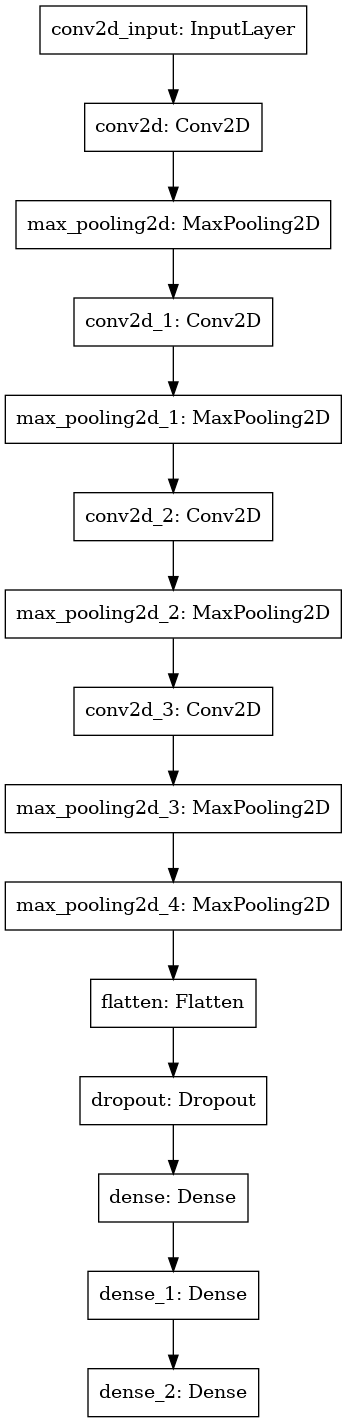

In [11]:
keras.utils.plot_model(model)

In [12]:
model.compile(keras.optimizers.RMSprop(lr=0.001),"sparse_categorical_crossentropy",["acc"])

In [13]:
model_his = model.fit_generator(train,
                    100,
                    10,
                    validation_data=valid,
                    validation_steps=19)

/home/vaibhav/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-08-30 09:26:13.564059: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-08-30 09:26:13.581091: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3593330000 Hz


Epoch 1/10
100/100 [==============================] - 112s 1s/step - loss: 16.6544 - acc: 0.5140 - val_loss: 1.1549 - val_acc: 0.4263
Epoch 2/10
100/100 [==============================] - 112s 1s/step - loss: 0.7937 - acc: 0.6930 - val_loss: 1.8143 - val_acc: 0.6474
Epoch 3/10
100/100 [==============================] - 112s 1s/step - loss: 0.6897 - acc: 0.7282 - val_loss: 1.6324 - val_acc: 0.5237
Epoch 4/10
100/100 [==============================] - 111s 1s/step - loss: 0.6265 - acc: 0.7492 - val_loss: 1.4731 - val_acc: 0.5789
Epoch 5/10
100/100 [==============================] - 111s 1s/step - loss: 0.4952 - acc: 0.8063 - val_loss: 3.2683 - val_acc: 0.6000
Epoch 6/10
100/100 [==============================] - 111s 1s/step - loss: 0.4740 - acc: 0.8056 - val_loss: 1.7561 - val_acc: 0.5474
Epoch 7/10
100/100 [==============================] - 112s 1s/step - loss: 0.4494 - acc: 0.8231 - val_loss: 1.7696 - val_acc: 0.5553
Epoch 8/10
100/100 [==============================] - 112s 1s/step -

(0.0, 1.0)

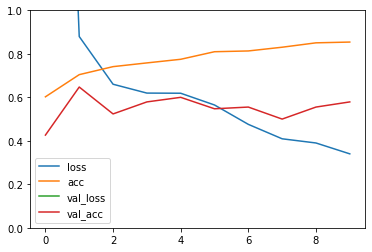

In [14]:
pd.DataFrame(model_his.history).plot()
plt.gca().set_ylim(0,1)

In [15]:
model_his = model.fit_generator(train,
                    100,
                    10,
                    validation_data=valid,
                    validation_steps=19)

/home/vaibhav/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 113s 1s/step - loss: 0.3119 - acc: 0.8688 - val_loss: 3.1716 - val_acc: 0.5421
Epoch 2/10
100/100 [==============================] - 112s 1s/step - loss: 0.3097 - acc: 0.8744 - val_loss: 2.8731 - val_acc: 0.5816
Epoch 3/10
100/100 [==============================] - 113s 1s/step - loss: 0.3021 - acc: 0.8754 - val_loss: 2.1709 - val_acc: 0.5211
Epoch 4/10
100/100 [==============================] - 112s 1s/step - loss: 0.3057 - acc: 0.8865 - val_loss: 3.7109 - val_acc: 0.5289
Epoch 5/10
100/100 [==============================] - 112s 1s/step - loss: 0.2960 - acc: 0.9046 - val_loss: 3.0325 - val_acc: 0.5658
Epoch 6/10
100/100 [==============================] - 111s 1s/step - loss: 0.2362 - acc: 0.9157 - val_loss: 4.6008 - val_acc: 0.5579
Epoch 7/10
100/100 [==============================] - 112s 1s/step - loss: 0.2382 - acc: 0.9190 - val_loss: 5.3558 - val_acc: 0.5842
Epoch 8/10
100/100 [==============================] - 110s 1s/step - 

(0.0, 1.0)

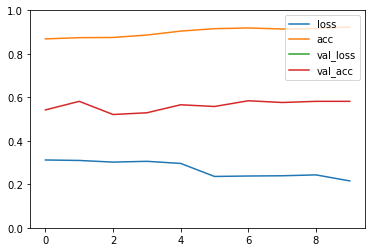

In [18]:
pd.DataFrame(model_his.history).plot()
plt.gca().set_ylim(0,1)

In [32]:
del model
keras.backend.clear_session()

# Resolving Overfitting

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
train_dir = r"/home/vaibhav/Downloads/covid/archive (1)/train"
test_dir = r"/home/vaibhav/Downloads/covid/archive (1)/test"

In [36]:
train_gen = ImageDataGenerator(rotation_range=40,
                               width_shift_range=0.25,
                               height_shift_range=0.25,
                               shear_range=0.25,
                               zoom_range=0.35,
                               horizontal_flip=True)
test_gen = ImageDataGenerator(validation_split = 0.4)

In [37]:
train = train_gen.flow_from_directory(train_dir,
                                      (300,400),
                                      "grayscale",
                                      class_mode = 'sparse',
                                      batch_size = 20)

valid = test_gen.flow_from_directory(test_dir,
                                      (300,400),
                                      "grayscale",
                                      class_mode = 'sparse',
                                      batch_size = 20,
                                     subset="validation")

Found 2002 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [38]:
model = keras.models.Sequential()

In [39]:
from tensorflow.keras import layers

In [40]:
model.add(layers.Conv2D(32,(3,3),activation = "relu",input_shape=(300,400,1)))

In [41]:
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,
                        (3,3),
                        activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,
                        (3,3),
                        activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,
                        (3,3),
                        activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dropout(0.4))

model.add(layers.Dense(200,activation="relu"))
model.add(layers.Dense(200,activation="relu"))

model.add(layers.Dense(4,activation="softmax"))

In [42]:
model.compile(keras.optimizers.RMSprop(lr=0.001),"sparse_categorical_crossentropy",["acc"])

In [43]:
model_his = model.fit_generator(train,
                    100,
                    10,
                    validation_data=valid,
                    validation_steps=19)

Epoch 1/10
100/100 [==============================] - 109s 1s/step - loss: 14.0393 - acc: 0.4293 - val_loss: 3.2540 - val_acc: 0.4553
Epoch 2/10
100/100 [==============================] - 107s 1s/step - loss: 1.2519 - acc: 0.5231 - val_loss: 1.1415 - val_acc: 0.4395
Epoch 3/10
100/100 [==============================] - 107s 1s/step - loss: 1.0618 - acc: 0.5982 - val_loss: 1.2384 - val_acc: 0.3632
Epoch 4/10
100/100 [==============================] - 107s 1s/step - loss: 1.0255 - acc: 0.6145 - val_loss: 0.9095 - val_acc: 0.6342
Epoch 5/10
100/100 [==============================] - 107s 1s/step - loss: 0.9123 - acc: 0.6263 - val_loss: 0.8646 - val_acc: 0.6816
Epoch 6/10
100/100 [==============================] - 107s 1s/step - loss: 0.8334 - acc: 0.6827 - val_loss: 0.9682 - val_acc: 0.5421
Epoch 7/10
100/100 [==============================] - 107s 1s/step - loss: 0.8336 - acc: 0.6741 - val_loss: 0.8984 - val_acc: 0.6368
Epoch 8/10
100/100 [==============================] - 107s 1s/step -

(0.0, 1.0)

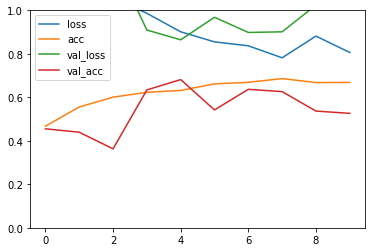

In [44]:
pd.DataFrame(model_his.history).plot()
plt.gca().set_ylim(0,1)

In [45]:
model_his = model.fit_generator(train,
                    100,
                    10,
                    validation_data=valid,
                    validation_steps=19)

/home/vaibhav/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 108s 1s/step - loss: 0.7900 - acc: 0.6746 - val_loss: 0.7531 - val_acc: 0.6789
Epoch 2/10
100/100 [==============================] - 109s 1s/step - loss: 0.7671 - acc: 0.6776 - val_loss: 0.8321 - val_acc: 0.6368
Epoch 3/10
100/100 [==============================] - 108s 1s/step - loss: 1.0004 - acc: 0.6413 - val_loss: 1.3961 - val_acc: 0.3447
Epoch 4/10
100/100 [==============================] - 108s 1s/step - loss: 0.7763 - acc: 0.6791 - val_loss: 0.7810 - val_acc: 0.7000
Epoch 5/10
100/100 [==============================] - 108s 1s/step - loss: 0.7749 - acc: 0.6882 - val_loss: 0.7892 - val_acc: 0.6895
Epoch 6/10
100/100 [==============================] - 108s 1s/step - loss: 0.7732 - acc: 0.6872 - val_loss: 0.8375 - val_acc: 0.6211
Epoch 7/10
100/100 [==============================] - 107s 1s/step - loss: 0.7628 - acc: 0.6796 - val_loss: 0.9850 - val_acc: 0.5632
Epoch 8/10
100/100 [==============================] - 107s 1s/step - 

(0.0, 1.0)

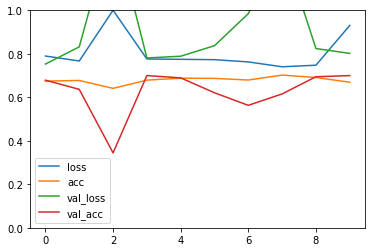

In [46]:
pd.DataFrame(model_his.history).plot()
plt.gca().set_ylim(0,1)

In [48]:
test = test_gen.flow_from_directory(test_dir,
                                      (300,400),
                                      "grayscale",
                                      class_mode = 'sparse',
                                      batch_size = 20,
                                     subset="training")

Found 594 images belonging to 4 classes.


In [50]:
score = model.evaluate_generator(test,29)

In [51]:
print("Accuracy: ",score[1])
print("Loss: ",score[0])

Accuracy:  0.7534482479095459
Loss:  0.6942911744117737
